In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from patsy import dmatrices
import sklearn

In [68]:
attrition_data = pd.read_csv("C:\\Users\\KAMAL PAUL\\Desktop\\IBM Attrition Data.csv")

In [69]:
attrition_data 

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9


In [70]:
attrition_data.isna().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

In [71]:
attrition_data.shape 

(1470, 13)

In [72]:
attrition_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [73]:
attrition_data.describe() 

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [74]:
attrition_data.head() 

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [75]:
attrition_data.tail() 

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9
1469,34,No,Research & Development,8,3,Medical,2,3,Married,4404,2,4,4


In [76]:
#get collumns of dataset
print(attrition_data.columns)

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')


In [77]:
#get data on the age column
attrition_age = attrition_data[["Age"]] 
attrition_age

,Age
0,41
1,49
2,37
3,33
4,27
...,...
1465,36
1466,39
1467,27
1468,49


In [78]:
#get the count of age represented in the dataset
age_count = attrition_data.Age.value_counts() 
age_count 

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

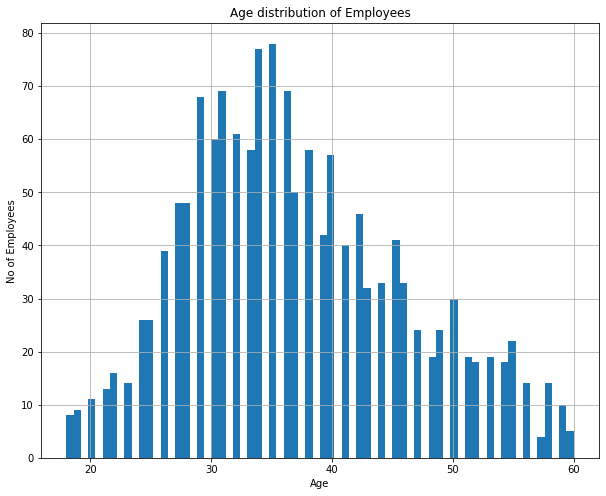

In [79]:
#Find the age distribution of employees in IBM
plt.figure(figsize=(10,8))
attrition_data['Age'].hist(bins=70)
plt.title("Age distribution of Employees")
plt.xlabel("Age")
plt.ylabel("No of Employees")
plt.show()

C:\Users\KAMAL PAUL\AppData\Local\Temp\ipykernel_9272\2531695212.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major',axis='y')


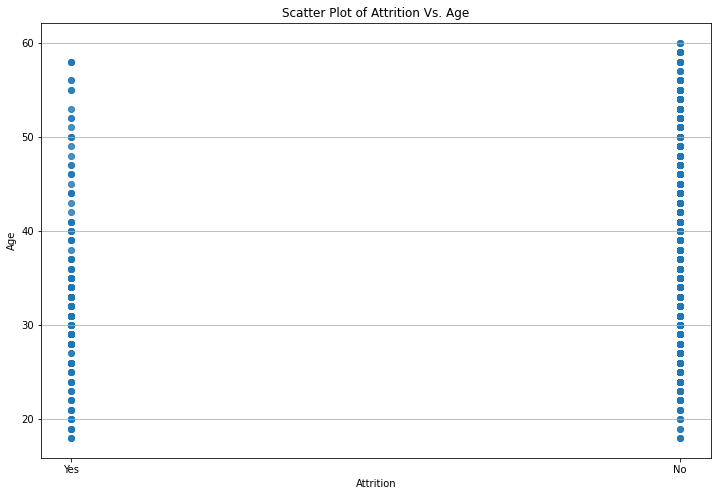

In [80]:
#Explore attrition by age
plt.figure(figsize=(12,8))
plt.scatter(attrition_data.Attrition, attrition_data.Age, alpha = .55)
plt.title("Scatter Plot of Attrition Vs. Age")
plt.xlabel("Attrition")
plt.ylabel("Age")
plt.grid(b=True, which='major',axis='y')
plt.show()

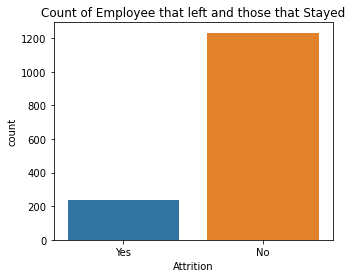

In [81]:
#Explore data for employees that left
plt.figure(figsize=(5,4))
sns.countplot(x = "Attrition", data = attrition_data)
plt.title("Count of Employee that left and those that Stayed")
plt.show()


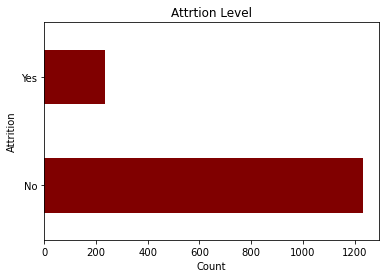

In [82]:
attrition_data.Attrition.value_counts().plot(kind='barh',color='maroon')
plt.xlabel("Count")
plt.ylabel("Attrition")
plt.title("Attrtion Level")
plt.show()

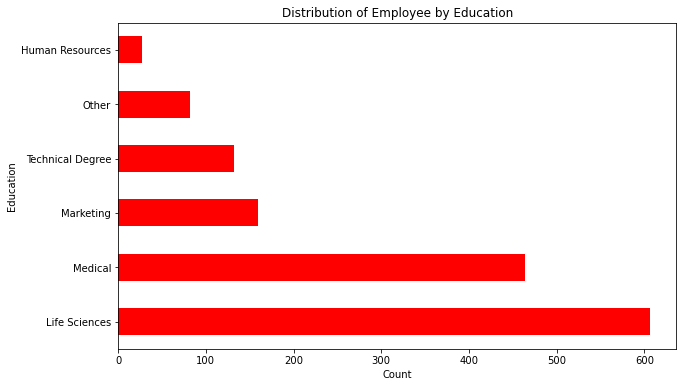

In [83]:
#Find out the distribution of employees by the education field
plt.figure(figsize=(10,6))
attrition_data.EducationField.value_counts().plot(kind='barh',color='red')
plt.xlabel("Count")
plt.ylabel("Education")
plt.title("Distribution of Employee by Education")
plt.show()

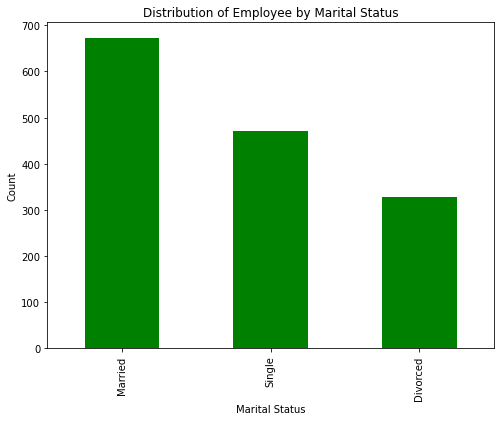

In [84]:
#Give a bar chart for the number of married and unmarried employees
plt.figure(figsize=(8,6))
attrition_data.MaritalStatus.value_counts().plot(kind='bar',color='g')
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.title("Distribution of Employee by Marital Status")
plt.show()

In [85]:
#Build up a logistic regression model to predict which employees are likely to attrite

attrition_data.std()

C:\Users\KAMAL PAUL\AppData\Local\Temp\ipykernel_9272\1424696356.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  attrition_data.std()


Age                           9.135373
DistanceFromHome              8.106864
Education                     1.024165
EnvironmentSatisfaction       1.093082
JobSatisfaction               1.102846
MonthlyIncome              4707.956783
NumCompaniesWorked            2.498009
WorkLifeBalance               0.706476
YearsAtCompany                6.126525
dtype: float64

In [86]:
attrition_data["Attrition"].value_counts() 

No     1233
Yes     237
Name: Attrition, dtype: int64

In [87]:
#convert categorical data into numerical data
attrition_data["Attrition"].replace('Yes',1, inplace=True)
attrition_data["Attrition"].replace('No',0, inplace=True)

In [88]:
attrition_data 

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,0,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,1,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,0,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,0,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,0,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,0,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,0,Sales,2,3,Medical,4,2,Married,5390,2,2,9


In [89]:
attrition_data[['Attrition', 'Education']].corr() 

,Attrition,Education
Attrition,1.000000,-0.031373
Education,-0.031373,1.000000


In [90]:
attrition_data[['Attrition', 'MonthlyIncome']].corr() 

,Attrition,MonthlyIncome
Attrition,1.00000,-0.15984
MonthlyIncome,-0.15984,1.00000


In [91]:
attrition_data.corr() 

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
Age,1.000000,-0.159205,-0.001686,0.208034,0.010146,-0.004892,0.497855,0.299635,-0.021490,0.311309
Attrition,-0.159205,1.000000,0.077924,-0.031373,-0.103369,-0.103481,-0.159840,0.043494,-0.063939,-0.134392
DistanceFromHome,-0.001686,0.077924,1.000000,0.021042,-0.016075,-0.003669,-0.017014,-0.029251,-0.026556,0.009508
Education,0.208034,-0.031373,0.021042,1.000000,-0.027128,-0.011296,0.094961,0.126317,0.009819,0.069114
EnvironmentSatisfaction,0.010146,-0.103369,-0.016075,-0.027128,1.000000,-0.006784,-0.006259,0.012594,0.027627,0.001458
JobSatisfaction,-0.004892,-0.103481,-0.003669,-0.011296,-0.006784,1.000000,-0.007157,-0.055699,-0.019459,-0.003803
MonthlyIncome,0.497855,-0.159840,-0.017014,0.094961,-0.006259,-0.007157,1.000000,0.149515,0.030683,0.514285
NumCompaniesWorked,0.299635,0.043494,-0.029251,0.126317,0.012594,-0.055699,0.149515,1.000000,-0.008366,-0.118421
WorkLifeBalance,-0.021490,-0.063939,-0.026556,0.009819,0.027627,-0.019459,0.030683,-0.008366,1.000000,0.012089
YearsAtCompany,0.311309,-0.134392,0.009508,0.069114,0.001458,-0.003803,0.514285,-0.118421,0.012089,1.000000


In [92]:
X = attrition_data.drop(['Attrition'],axis=1)
X.head()
Y = attrition_data['Attrition']
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [93]:
attrition_data['EducationField'].replace('Life Sciences',1, inplace=True)
attrition_data['EducationField'].replace('Medical',2, inplace=True)
attrition_data['EducationField'].replace('Marketing', 3, inplace=True)
attrition_data['EducationField'].replace('Other',4, inplace=True)
attrition_data['EducationField'].replace('Technical Degree',5, inplace=True)
attrition_data['EducationField'].replace('Human Resources', 6, inplace=True)

In [94]:
attrition_data["EducationField"].value_counts() 

1    606
2    464
3    159
5    132
4     82
6     27
Name: EducationField, dtype: int64

In [95]:
attrition_data["Department"].value_counts() 

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [96]:
attrition_data['Department'].replace('Research & Development',1, inplace=True)
attrition_data['Department'].replace('Human Resources',2, inplace=True)
attrition_data['Department'].replace('Human Resources', 3, inplace=True)

In [97]:
attrition_data["MaritalStatus"].value_counts() 

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [98]:
attrition_data['MaritalStatus'].replace('Married',1, inplace=True)
attrition_data['MaritalStatus'].replace('Single',2, inplace=True)
attrition_data['MaritalStatus'].replace('Divorced',3, inplace=True)

In [99]:
attrition_data["MaritalStatus"].value_counts() 

1    673
2    470
3    327
Name: MaritalStatus, dtype: int64

In [100]:
x=attrition_data.select_dtypes(include=['int64'])
x.dtypes

Age                        int64
Attrition                  int64
DistanceFromHome           int64
Education                  int64
EducationField             int64
EnvironmentSatisfaction    int64
JobSatisfaction            int64
MaritalStatus              int64
MonthlyIncome              int64
NumCompaniesWorked         int64
WorkLifeBalance            int64
YearsAtCompany             int64
dtype: object

In [101]:
x.columns

Index(['Age', 'Attrition', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'WorkLifeBalance',
       'YearsAtCompany'],
      dtype='object')

In [102]:
y = attrition_data["Attrition"]
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [118]:
#dmatrices spli the categorical variable into set of indicator variables(department) and added a constant to regressor matrix
y, x = dmatrices('Attrition ~ Age + Department + \
                  DistanceFromHome + Education + EducationField + YearsAtCompany',
                  attrition_data, return_type="dataframe")
print (x.columns)

Index(['Intercept', 'Department[T.2]', 'Department[T.Sales]', 'Age',
       'DistanceFromHome', 'Education', 'EducationField', 'YearsAtCompany'],
      dtype='object')


In [119]:
print(x)

      Intercept  Department[T.2]  Department[T.Sales]   Age  DistanceFromHome  \
0           1.0              0.0                  1.0  41.0               1.0   
1           1.0              0.0                  0.0  49.0               8.0   
2           1.0              0.0                  0.0  37.0               2.0   
3           1.0              0.0                  0.0  33.0               3.0   
4           1.0              0.0                  0.0  27.0               2.0   
...         ...              ...                  ...   ...               ...   
1465        1.0              0.0                  0.0  36.0              23.0   
1466        1.0              0.0                  0.0  39.0               6.0   
1467        1.0              0.0                  0.0  27.0               4.0   
1468        1.0              0.0                  1.0  49.0               2.0   
1469        1.0              0.0                  0.0  34.0               8.0   

      Education  EducationF

In [120]:
y = np.ravel(y)

In [121]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model = model.fit(x, y)

C:\Users\KAMAL PAUL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [122]:
# check the accuracy on the training set
model.score(x, y)

0.8394557823129252

In [123]:
y.mean()

0.16122448979591836

In [124]:
#split dataset into train and test datset and fit train data
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y, test_size=0.3, random_state=0)
model2=LogisticRegression()
model2.fit(X_train, y_train)

C:\Users\KAMAL PAUL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [125]:
#use model to predict new output values on the basis of new input values
predicted= model2.predict(X_test)
print (predicted)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [126]:
#use predict proba to predict the probability of model beign either class zero or class one
probs = model2.predict_proba(X_test)
print (probs)

[[0.84433703 0.15566297]
 [0.8178103  0.1821897 ]
 [0.70831898 0.29168102]
 [0.83216005 0.16783995]
 [0.74804722 0.25195278]
 [0.79829683 0.20170317]
 [0.83945357 0.16054643]
 [0.83697465 0.16302535]
 [0.96261691 0.03738309]
 [0.93888509 0.06111491]
 [0.95323272 0.04676728]
 [0.83639646 0.16360354]
 [0.87136669 0.12863331]
 [0.87432457 0.12567543]
 [0.8907434  0.1092566 ]
 [0.89535153 0.10464847]
 [0.89222519 0.10777481]
 [0.79817947 0.20182053]
 [0.79529319 0.20470681]
 [0.88398554 0.11601446]
 [0.72298707 0.27701293]
 [0.94902803 0.05097197]
 [0.87307737 0.12692263]
 [0.82357076 0.17642924]
 [0.56580252 0.43419748]
 [0.78035104 0.21964896]
 [0.92183407 0.07816593]
 [0.92400773 0.07599227]
 [0.6538157  0.3461843 ]
 [0.84777526 0.15222474]
 [0.87205284 0.12794716]
 [0.84359315 0.15640685]
 [0.86731794 0.13268206]
 [0.95829875 0.04170125]
 [0.84318629 0.15681371]
 [0.87364532 0.12635468]
 [0.89092287 0.10907713]
 [0.69357844 0.30642156]
 [0.89319877 0.10680123]
 [0.81547554 0.18452446]


In [127]:
# Use accuracy score to calculates the accuracy score for the predicted labels against the true labels. it calculate the ratio of the sum of true positive and true negatives out of all the predictions
# roc auc score is used to sort the predictive possibilities. 0.5 is the bseline for random guessing, so the value must always be above 0.5.
from sklearn import metrics

print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))

0.8435374149659864
0.6509048902579901


In [128]:
#generate a confusion matrix: use it to measure how many out of all the positive prediction is correct.ie out of all the +ve predicted values, how many in total as found in the sample were positive.
print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted))

[[371   0]
 [ 69   1]]
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       371
         1.0       1.00      0.01      0.03        70

    accuracy                           0.84       441
   macro avg       0.92      0.51      0.47       441
weighted avg       0.87      0.84      0.77       441



In [114]:
print (X_train)

      Intercept  Department[T.2]  Department[T.Sales]   Age  DistanceFromHome  \
338         1.0              0.0                  1.0  30.0               5.0   
363         1.0              0.0                  1.0  33.0               5.0   
759         1.0              1.0                  0.0  45.0              24.0   
793         1.0              0.0                  0.0  28.0              15.0   
581         1.0              0.0                  0.0  30.0               1.0   
...         ...              ...                  ...   ...               ...   
763         1.0              0.0                  1.0  34.0              10.0   
835         1.0              1.0                  0.0  35.0               8.0   
1216        1.0              0.0                  1.0  43.0               2.0   
559         1.0              0.0                  0.0  38.0               2.0   
684         1.0              0.0                  1.0  40.0              10.0   

      Education  EducationF

In [116]:
#add random values to KK according to the parameters mentioned above to check the proabily of attrition of the employee
kk=[[1.0, 23.0, 1.0, 500.0, 3.0, 24.0, 1.0, 25.0]]
print(model.predict_proba(kk))

[[9.99999990e-01 1.03945025e-08]]


C:\Users\KAMAL PAUL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
